In [26]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 3s 1us/step


In [11]:
X_train_full.shape

(60000, 28, 28)

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7273 - accuracy: 0.7624 - val_loss: 0.5259 - val_accuracy: 0.8216
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4890 - accuracy: 0.8300 - val_loss: 0.4546 - val_accuracy: 0.8450
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4442 - accuracy: 0.8438 - val_loss: 0.4425 - val_accuracy: 0.8464
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4156 - accuracy: 0.8543 - val_loss: 0.4049 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3954 - accuracy: 0.8622 - val_loss: 0.3761 - val_accuracy: 0.8724
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3793 - accuracy: 0.8675 - val_loss: 0.3728 - val_accuracy: 0.8688
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3651 - accuracy: 0.8709 - val_loss: 0.3704 - val_accuracy

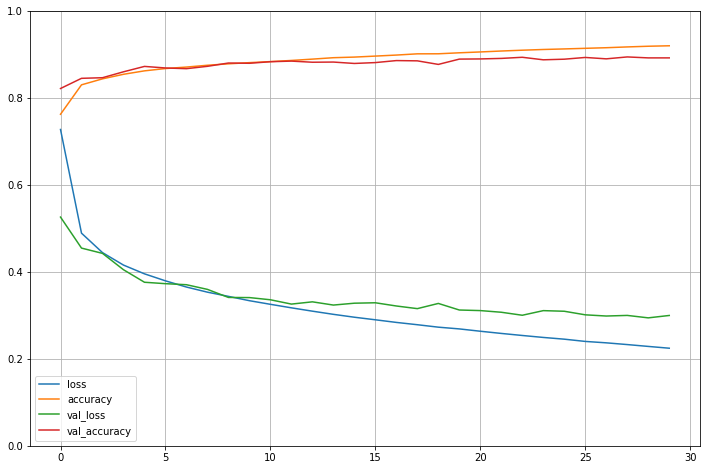

In [21]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 60.0363 - accuracy: 0.8567


[60.036319732666016, 0.8567000031471252]

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = model.predict(X_new)
np.array(class_names)[np.argmax(y_pred, axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')